 # MKA-MLF, Lab_07 Convolutional Neural Networks

## Exercise - XOR Gate

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical



###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


#### 1.2 Dataset examination

Using the following code, display random images,

In [4]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

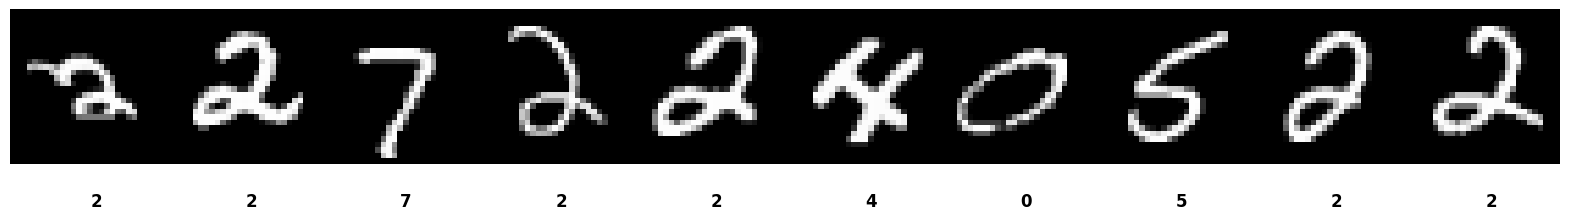

In [5]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- **What kind of data occurs in our dataset?**\
Grayscale images of handwritten data
- **How many data samples do we have in train and test datasets?**\
Train (60000, 28, 28), Test (10000, 28, 28)
- **How many colour channels does the input variable have?**\
One channel
- **What is the size of the input images?**\
28x28
- **What is the necessary preprocessing of the input data X?**\
Normalization.
- **How many classes do we have in target variable?**\
10
- **What is the necessary preprocessing of target variable y?**\
Convert it to One-hot encoding

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [7]:
###################################
# Write your own code here #


# Normalize the input images
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# Reshape the images to include channel dimension for CNN
X_train_reshaped = X_train_normalized.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test_normalized.reshape(-1, 28, 28, 1)

# One-hot encode the target variable
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

print("X_train shape:", X_train_reshaped.shape)
print("y_train shape:", y_train_encoded.shape)



###################################

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [15]:
###################################
# Write your own code here #
model= Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

###################################


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         346,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,690 (1.33 MB)

 Trainable params: 347,690 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [16]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [17]:
###################################
# Write your own code here #
# Train the model
history = model.fit(
    X_train_reshaped, y_train_encoded,
    validation_split=0.2,
    epochs=10,
    batch_size=64
)



###################################

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8717 - loss: 0.4727 - val_accuracy: 0.9707 - val_loss: 0.0988
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9755 - loss: 0.0832 - val_accuracy: 0.9799 - val_loss: 0.0664
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9867 - loss: 0.0474 - val_accuracy: 0.9819 - val_loss: 0.0627
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9896 - loss: 0.0347 - val_accuracy: 0.9820 - val_loss: 0.0577
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9929 - loss: 0.0231 - val_accuracy: 0.9812 - val_loss: 0.0631
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.9949 - loss: 0.0171 - val_accuracy: 0.9838 - val_loss: 0.0586
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.9964 - loss: 0.0119 - val_accuracy: 0.9852 - val_loss: 0.0513
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9973 - loss: 0.0085 - 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

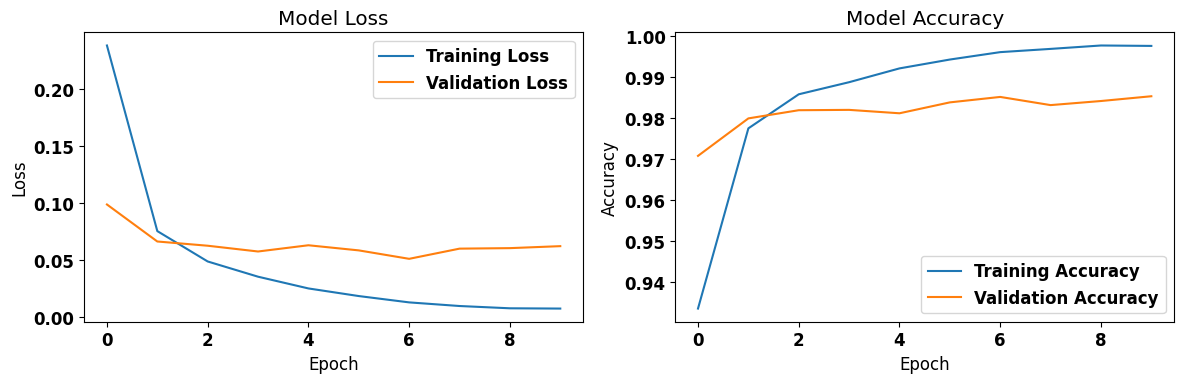

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9825 - loss: 0.0639
Test Loss: 0.0528
Test Accuracy: 0.9860


In [19]:
###################################
# Write your own code here #
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

###################################

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


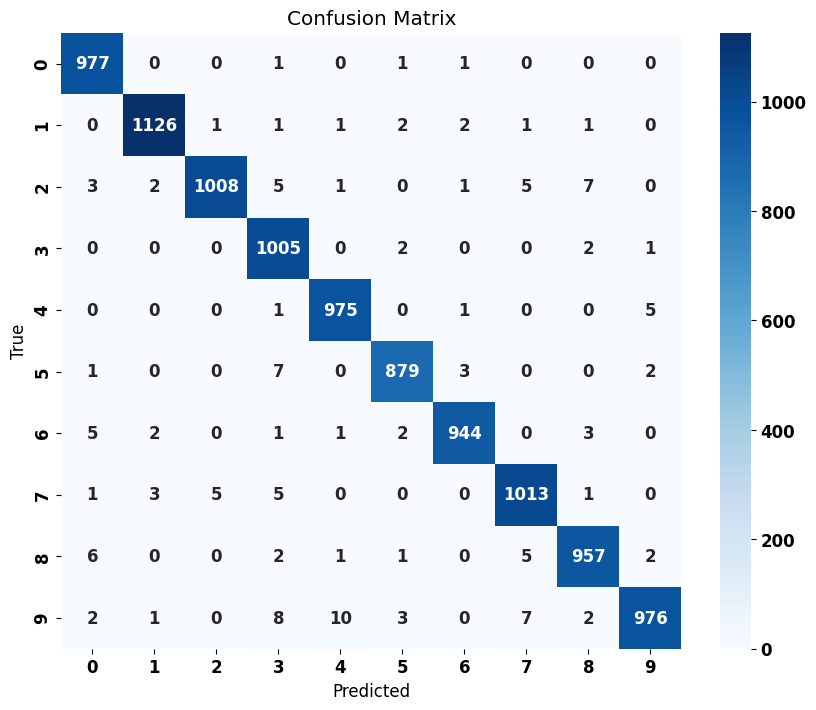

In [20]:
###################################
# Write your own code here #
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


###################################

### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.7963 - loss: 0.6252 - val_accuracy: 0.9789 - val_loss: 0.0770
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.9591 - loss: 0.1328 - val_accuracy: 0.9843 - val_loss: 0.0512
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9723 - loss: 0.0927 - val_accuracy: 0.9876 - val_loss: 0.0421
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9764 - loss: 0.0771 - val_accuracy: 0.9875 - val_loss: 0.0429
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9794 - loss: 0.0682 - val_accuracy: 0.9893 - val_loss: 0.0366
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 57ms/step - accuracy: 0.9811 - loss: 0.0585 - val_accuracy: 0.9896 - val_loss: 0.0355
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9820 - loss: 0.0585 - val_accuracy: 0.9912 - val_loss: 0.0329
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9829 - loss: 0.0536 - 

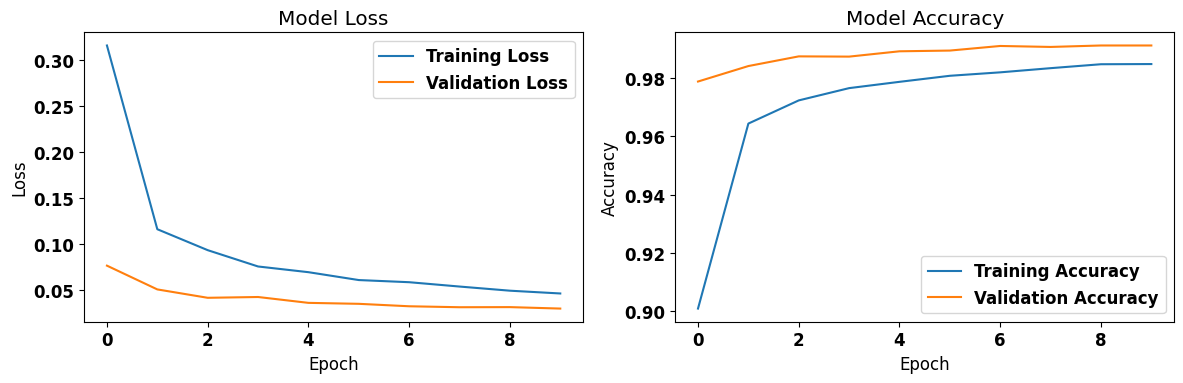

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9904 - loss: 0.0265
Test Loss: 0.0215
Test Accuracy: 0.9926


In [21]:
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and Dense Layers
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# Compile the model
learning_rate = 0.001
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_reshaped, y_train_encoded,
    validation_split=0.2,
    epochs=10,
    batch_size=64
)

###################################
# Write your own code here #
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_encoded)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

###################################
